In [1]:
import sys 
sys.path.append('..')
# sys.path.insert(0,'/home/ildefog/pydyno')
import pydyno
print(pydyno.__file__)
from pydyno.discretization.pysb_discretize import PysbDomPath
from pydyno.seqanalysis import SeqAnalysis
from pydyno.visualize_simulations import VisualizeSimulations
from pydyno.visualize_discretization import visualization_path
%matplotlib inline
import random
import h5py
from pydyno.dominant_path_frequency_analysis import FreqAnalysis
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../')
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns

/home/ildefog/.local/lib/python3.7/site-packages/pydyno-0.1.1+94.g9b93be5-py3.7-linux-x86_64.egg/pydyno/__init__.py


In [2]:
pars = np.load('../necro_pars10k_allclusmod.npy')

In [ ]:
for i,sp in enumerate(model.species):
    print(i,":",sp)

In [3]:
m = model.components
tspan = np.linspace(0, 1800, 500)

In [4]:
solverwt0 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
result100 = solverwt0.run(param_values=pars, num_processors = 20)
# result100.save('sim_nerm_allpars_tnf100.h5')

2021-11-17 20:27:25.722 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-11-17 20:27:26.740 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-11-17 20:27:26.861 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-11-17 20:27:27.400 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-11-17 20:56:33.203 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-11-17 20:56:33.206 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-11-17 20:56:38.835 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [ ]:
for i,sp in enumerate(model.species):
    print(i,":",sp)

In [5]:
dp_nerm_100 = PysbDomPath(model, result100)

In [6]:
signs_nerm_100, paths_nerm_100 = dp_nerm_100.get_path_signatures('s24', 'production', 
                                                                 depth=15, dom_om=0.5, num_processors = 20)

In [60]:
signs_nerm_100.save('sequences_nerm_depth15_om05_s24_production_tnf100.h5', dominant_paths=paths_nerm_100)
#signs_truncated, paths = SeqAnalysis.load('sequences_aearm_depth10_om1_s2_consumption_reorganized_labels.h5')
#how to save and load

In [70]:
signs_nerm_100, paths_nerm_100 = SeqAnalysis.load('sequences_nerm_depth15_om05_s24_production_tnf100.h5')

### DO NOT CHANGE: : code to obtain sequences shown in paper ###
# dp = PysbDomPath(apo_model, sim_all_pars)
# signs_s2_consumption, paths = dp.get_path_signatures('s2', 'consumption', depth=10, dom_om=1, num_processors=120)
# signs_truncated = signs_s2_consumption.truncate_sequences(260)
# signs_truncated.dissimilarity_matrix(num_processors=120)
# signs_truncated.silhouette_score_agglomerative_range(10 ,num_processors=1) # n_clusters best silhouette score: 3
# signs_truncated.agglomerative_clustering(3)

### Reorganizing clustering labels for visualization purposes
# reorganized_labels = np.copy(signs_truncated.labels)
# mask_cluster0 = reorganized_labels == 0
# mask_cluster1 = reorganized_labels == 1
# mask_cluster2 = reorganized_labels == 2
# reorganized_labels[mask_cluster0] = 2
# reorganized_labels[mask_cluster1] = 1
# reorganized_labels[mask_cluster2] = 3
# signs_truncated.labels = reorganized_labels

# signs_truncated.save('sequences_aearm_depth10_om1_s2_consumption_reorganized_labels.h5', dominant_paths=paths)
####################

TypeError: load() got an unexpected keyword argument 'dominant_paths'

In [ ]:
## Reorganizing clustering labels for visualization purposes
reorganized_labels = np.copy(signs_nerm_100.labels)
mask_cluster0 = reorganized_labels == 0
mask_cluster1 = reorganized_labels == 1
mask_cluster2 = reorganized_labels == 2
reorganized_labels[mask_cluster0] = 2
reorganized_labels[mask_cluster1] = 1
reorganized_labels[mask_cluster2] = 3
signs_nerm_100.labels = reorganized_labels

<Figure size 1440x720 with 0 Axes>

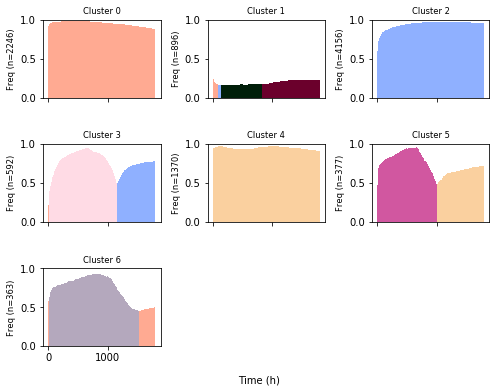

In [62]:
plt.figure(figsize = (20,10))
signs_nerm_100.plot_sequences(type_fig='modal')
plt.show()

In [7]:
signs_nerm_100.dissimilarity_matrix()

array([[  0.,  70., 332., ..., 998., 998., 998.],
       [ 70.,   0., 262., ..., 928., 928., 928.],
       [332., 262.,   0., ..., 666., 666., 902.],
       ...,
       [998., 928., 666., ...,   0., 212., 890.],
       [998., 928., 666., ..., 212.,   0., 890.],
       [998., 928., 902., ..., 890., 890.,   0.]])

In [8]:
signs_nerm_100.silhouette_score_spectral_range(range(2,10),num_processors = 20)

,num_clusters,cluster_silhouette
0,2,0.497800
1,3,0.640364
2,4,0.676874
3,5,0.700608
4,6,0.717054
5,7,0.739345
6,8,0.743782
7,9,0.665664


In [9]:
signs_nerm_100.silhouette_score_agglomerative_range(10 ,num_processors=20) # n_clusters best silhouette score: 3

,num_clusters,cluster_silhouette
0,2,0.265461
1,3,0.454350
2,4,0.623689
3,5,0.649065
4,6,0.667171
5,7,0.672234
6,8,0.666821
7,9,0.676748
8,10,0.681235


In [ ]:
signs_nerm_100.agglomerative_clustering(2)

In [57]:
signs_nerm_100.spectral_clustering(7)

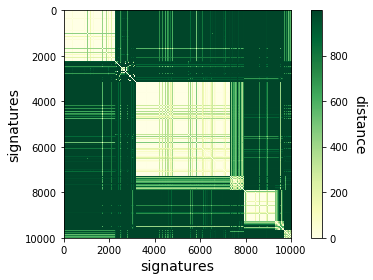

In [58]:
sorted_label_idxs = np.argsort(signs_nerm_100.labels)
sorted_diss = signs_nerm_100.diss[sorted_label_idxs, :]
sorted_diss = sorted_diss[:, sorted_label_idxs]
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im, cbar = heatmap(sorted_diss, range(10000), range(10000), ax=ax,
                   cmap="YlGn", cbarlabel="distance")
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('signatures', fontsize = 14)
plt.ylabel('signatures', fontsize = 14)
fig.tight_layout()
# plt.savefig('heatmap_clusters_necro_pydream_5chns_10k_5720_10tnf_aug.pdf')
plt.show()

<Figure size 1440x720 with 0 Axes>

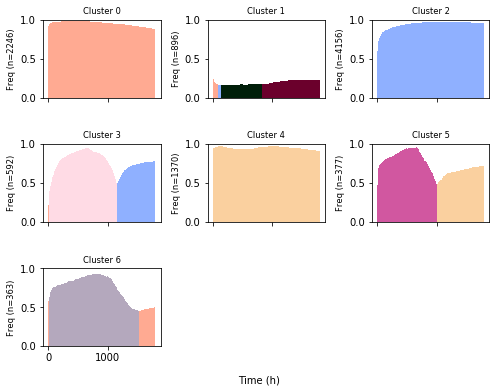

In [59]:
plt.figure(figsize = (20,10))
signs_nerm_100.plot_sequences(type_fig='modal')
plt.show()

<Figure size 1440x720 with 0 Axes>

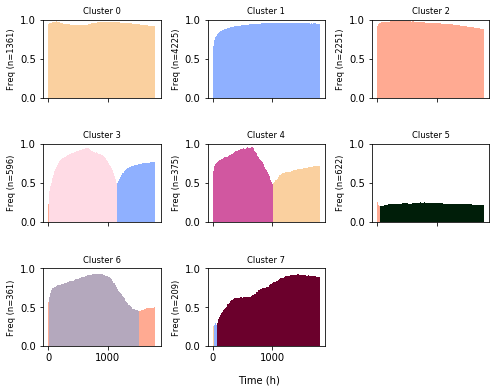

In [12]:
plt.figure(figsize = (20,10))
signs_nerm_100.plot_sequences(type_fig='modal')
plt.show()

In [50]:
def plot_sequences2(self, type_fig='modal', plot_all=False, title='', dir_path='', sort_seq=None):
    if plot_all:
        cluster_labels = np.zeros(len(self.seq_analysis.sequences), dtype=np.int)
    else:
        # Check that the sequences has been clustered
        if self.seq_analysis.labels is None:
            raise Exception('Cluster the sequences first')
        cluster_labels = self.seq_analysis.labels

    clusters = set(cluster_labels)
    if -1 in clusters:
        clusters = list(clusters)[:-1]  # this is to not plot the signatures that can't be clustered :( from hdbscan
    else:
        clusters = list(clusters)
    n_rows = int(math.ceil(len(clusters) / 3.))
    if len(clusters) == 1:
        f, axs = plt.subplots(n_rows, 1, sharex=True, figsize=(8, 6))
        axs = [axs]
    elif len(clusters) == 2:
        f, axs = plt.subplots(n_rows, 2, sharex=True, figsize=(8, 6))
    else:
        f, axs = plt.subplots(n_rows, 3, sharex=True, figsize=(15, 20))
        f.subplots_adjust(hspace=.6, wspace=.4)
        axs = axs.reshape(n_rows * 3)

        plots_off = (n_rows * 3) - len(clusters)
        for i in range(1, plots_off + 1):
            axs[-i].axis('off')

    if type_fig == 'modal':
        self.__modal(cluster_labels, clusters, axs, n_rows)

    elif type_fig == 'trajectories':
        self.__trajectories(cluster_labels, clusters, axs, n_rows, sort_seq)

    elif type_fig == 'entropy':
        self.__entropy(cluster_labels, clusters, f, axs, n_rows)

    else:
        raise NotImplementedError('Type of visualization not implemented')

    plt.setp([a.get_xticklabels() for a in f.axes[:-3]], visible=False)
    plt.suptitle(title)
    f.text(0.5, 0.04, 'Time', ha='center')
#     final_path = os.path.join(dir_path, type_fig + '.png')
#     plt.savefig(final_path, bbox_inches='tight', format='png')
    # plt.close('all')
    plt.show()

    return

In [53]:
plot_sequences2(signs_nerm_100,type_fig='trajectories')

AttributeError: 'SeqAnalysis' object has no attribute 'seq_analysis'

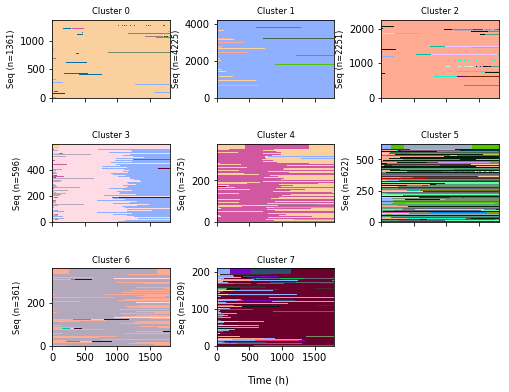

In [13]:
signs_nerm_100.plot_sequences(type_fig='trajectories')

In [14]:
vt = VisualizeSimulations(model, sim_results=result100, 
                          clusters=signs_nerm_100.labels)

{'plot_spMLKLa_obs_cluster0': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e3e3410>),
 'plot_spMLKLa_obs_cluster1': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e2b5190>),
 'plot_spMLKLa_obs_cluster2': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e183110>),
 'plot_spMLKLa_obs_cluster3': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e19c0d0>),
 'plot_spMLKLa_obs_cluster4': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e007110>),
 'plot_spMLKLa_obs_cluster5': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e0390d0>),
 'plot_spMLKLa_obs_cluster6': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4dfea090>),
 'plot_spMLKLa_obs_cluster7': (<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubpl

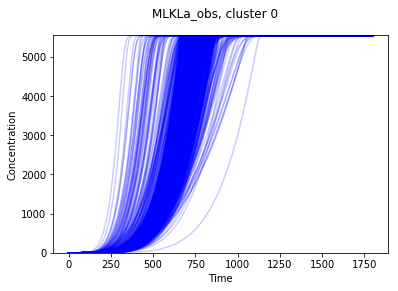

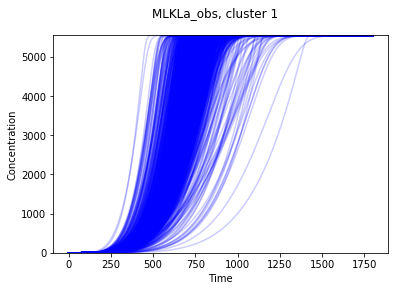

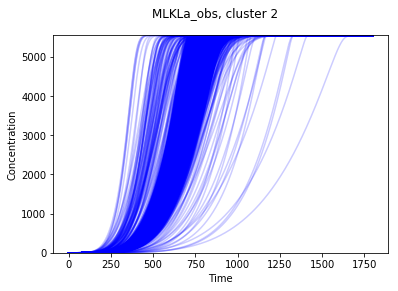

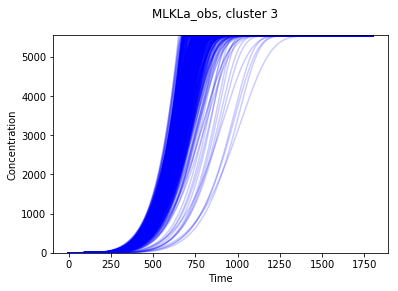

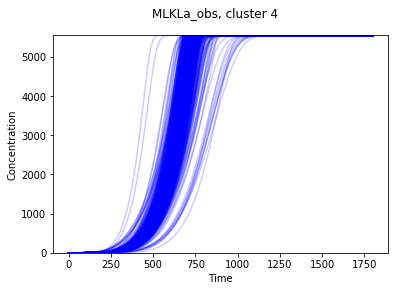

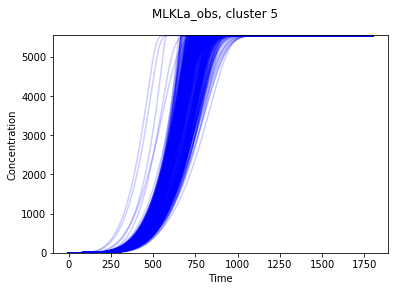

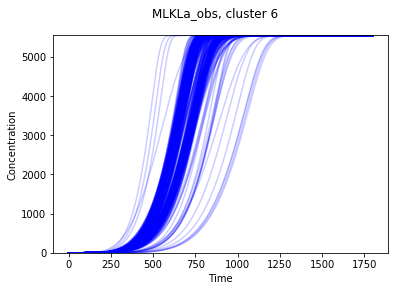

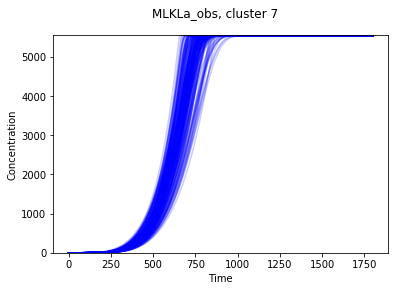

In [17]:
vt.plot_cluster_dynamics(components=['MLKLa_obs'])

In [65]:
cluster_label_idxs = VisualizeSimulations.check_clusters_arg(signs_nerm_100.labels, nsims=10000)

In [33]:
pars_cluster_0 = result100.param_values[cluster_label_idxs[0]]
pars_cluster_1 = result100.param_values[cluster_label_idxs[1]]
pars_cluster_2 = result100.param_values[cluster_label_idxs[2]]
pars_cluster_3 = result100.param_values[cluster_label_idxs[3]]
pars_cluster_4 = result100.param_values[cluster_label_idxs[4]]
pars_cluster_5 = result100.param_values[cluster_label_idxs[5]]
pars_cluster_6 = result100.param_values[cluster_label_idxs[6]]
pars_cluster_7 = result100.param_values[cluster_label_idxs[7]]
print(len(pars_cluster_0))
print(len(pars_cluster_1))
print(len(pars_cluster_2))
print(len(pars_cluster_3))
print(len(pars_cluster_4))
print(len(pars_cluster_5))
print(len(pars_cluster_6))
print(len(pars_cluster_7))

1361
4225
2251
596
375
622
361
209


In [64]:
rep_signatures=signs_nerm_100.seq_representativeness(method='centrality', clus_labels=signs_nerm_100.labels)

In [74]:
print(rep_signatures[0])
from pydyno.visualize_discretization import visualization_seq_paths
# visualization_seq_paths(result100, rep_signatures[0], signs_nerm_100)

((4846, 1), array([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28

((0, 1), array([57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 5

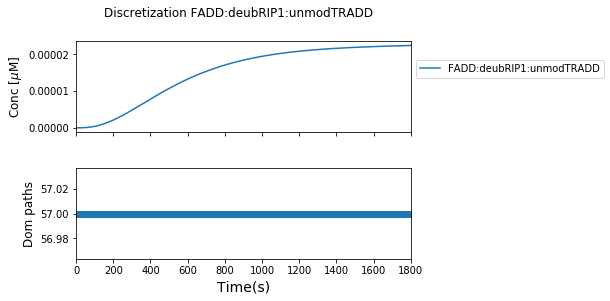

In [44]:
print(rep_signatures[0])
from pydyno.visualize_discretization import visualization_seq_paths
visualization_seq_paths(result100, 0, signs_nerm_100)
# plt.savefig('visualization_seq_paths_clus0_sigs100n_3528.pdf')

In [ ]:
visualization_path(model, paths_nerm_100[57], type_analysis='production', 
                   filename='cluster0100tnf_CII_s24_prod_1om_depth15_path57_10k_5720_112021.pdf')

((8079, 1), array([47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       84, 84

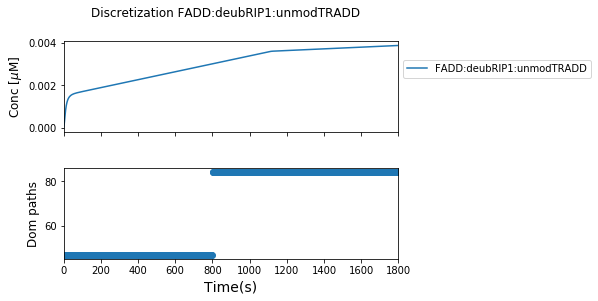

In [73]:
print(rep_signatures[1])
visualization_seq_paths(result100, 8079, signs_nerm_100)

In [71]:
visualization_path(model, paths_nerm_100[14], type_analysis='production', 
                   filename='cluster1100tnf_CII_s24_prod_1om_depth15_path14_10k_5720_112021.pdf')

KeyError: 14

In [54]:
visualization_path(model, paths_nerm_100[14], type_analysis='production', 
                   filename='cluster1100tnf_CII_s24_prod_1om_depth15_path14_10k_5720_112021.pdf')

((4849, 1), array([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28

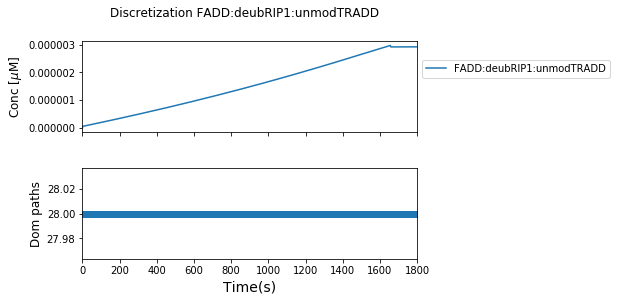

In [45]:
print(rep_signatures[2])
visualization_seq_paths(result100, 4849, signs_nerm_100)

In [55]:
visualization_path(model, paths_nerm_100[28], type_analysis='production', 
                   filename='cluster2100tnf_CII_s24_prod_1om_depth15_path28_10k_5720_112021.pdf')

((6726, 1), array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8

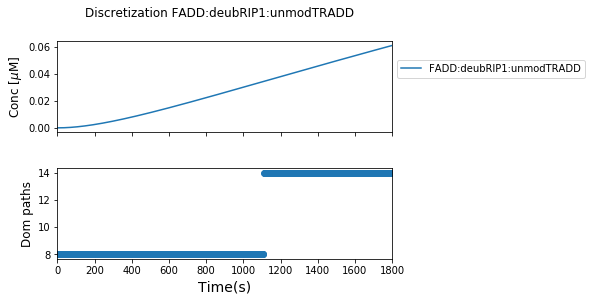

In [67]:
print(rep_signatures[3])
visualization_seq_paths(result100, 6726, signs_nerm_100)

In [68]:
visualization_path(model, paths_nerm_100[8], type_analysis='production', 
                   filename='cluster3100tnf_CII_s24_prod_1om_depth15_path8_10k_5720_112021.pdf')
visualization_path(model, paths_nerm_100[14], type_analysis='production', 
                   filename='cluster3100tnf_CII_s24_prod_1om_depth15_path14_10k_5720_112021.pdf')

KeyError: 8

((2977, 1), array([59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59

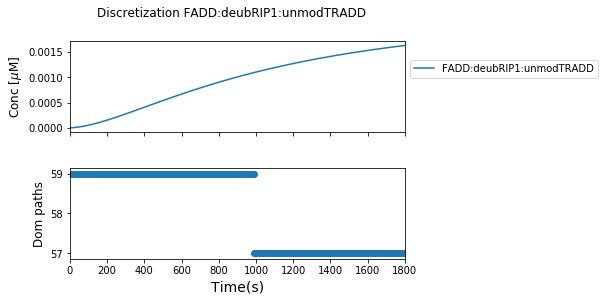

In [48]:
print(rep_signatures[4])
visualization_seq_paths(result100, 2977, signs_nerm_100)

In [69]:
visualization_path(model, paths_nerm_100[59], type_analysis='production', 
                   filename='cluster3100tnf_CII_s24_prod_1om_depth15_path59_10k_5720_112021.pdf')
visualization_path(model, paths_nerm_100[57], type_analysis='production', 
                   filename='cluster3100tnf_CII_s24_prod_1om_depth15_path57_10k_5720_112021.pdf')

KeyError: 59

In [49]:
from IPython.display import Image
path_to_show = '57'
visualization_path(model, paths_nerm_100[path_to_show], 's24', 'production', f'path_{path_to_show}.png')
Image(filename=f'path_{path_to_show}.pdf') 

KeyError: '57'

In [32]:
visualization_path(model, paths_nerm_100[57], type_analysis='production', 
                   filename='cluster0100tnf_CII_s24_prod_1om_depth15_path57_10k_5720_112021.pdf')

In [35]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=3, metric='precomputed', perplexity=50,
                  early_exaggeration=30).fit_transform(signs_nerm_100.diss)

In [34]:
colors = ['red', 'blue', 'black', 'green', 'cyan', 'yellow', 'orange', 'purple']

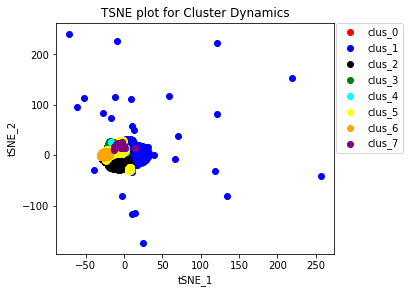

In [36]:
cluster0 = signs_nerm_100.labels == 0
cluster1 = signs_nerm_100.labels == 1
cluster2 = signs_nerm_100.labels == 2
cluster3 = signs_nerm_100.labels == 3
cluster4 = signs_nerm_100.labels == 4
cluster5 = signs_nerm_100.labels == 5
cluster6 = signs_nerm_100.labels == 6
cluster7 = signs_nerm_100.labels == 7

plt.scatter(X_embedded[cluster0, 0], X_embedded[cluster0, 1], c=colors[0], label='clus_0')
plt.scatter(X_embedded[cluster1, 0], X_embedded[cluster1, 1], c=colors[1], label='clus_1')
plt.scatter(X_embedded[cluster2, 0], X_embedded[cluster2, 1], c=colors[2], label='clus_2')
plt.scatter(X_embedded[cluster3, 0], X_embedded[cluster3, 1], c=colors[3], label='clus_3')
plt.scatter(X_embedded[cluster4, 0], X_embedded[cluster4, 1], c=colors[4], label='clus_4')
plt.scatter(X_embedded[cluster5, 0], X_embedded[cluster5, 1], c=colors[5], label='clus_5')
plt.scatter(X_embedded[cluster6, 0], X_embedded[cluster6, 1], c=colors[6], label='clus_6')
plt.scatter(X_embedded[cluster7, 0], X_embedded[cluster7, 1], c=colors[7], label='clus_7')

plt.legend(bbox_to_anchor=(1.25,1), borderaxespad=0)
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.tight_layout()
plt.title('TSNE plot for Cluster Dynamics')
# plt.savefig('necro_5720_10k_100tnf_sequences_cluster.pdf')
plt.show()